# COMP3010J - Machine Learning

## Yuyang Wang 19206226

# Import Necessary packages

In [65]:
# data analysis and preparing
import pandas as pd
import math
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# from tqdm import tqdm

# tqdm.pandas()

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
from sklearn.metrics import auc, roc_curve, confusion_matrix, f1_score

# Read data file

In [81]:
df = pd.read_csv('kickstarter201801.csv')

In [82]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 04:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 00:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 03:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 08:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                378661 non-null  int64  
 1   name                              378657 non-null  object 
 2   category                          378661 non-null  object 
 3   main_category                     378661 non-null  object 
 4   currency                          378661 non-null  object 
 5   deadline                          378661 non-null  object 
 6   goal                              378661 non-null  float64
 7   launched                          378661 non-null  object 
 8   pledged                           378661 non-null  float64
 9   state                             378661 non-null  object 
 10  backers                           378661 non-null  int64  
 11  country                           378661 non-null  o

## Data analysis

In [69]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [70]:
df.describe(percentiles=[.1, .2, .6, .7, .8, .9, .95, .99])

,ID,goal,pledged,backers,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
10%,2.164103e+08,6.750000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.000000e+02
20%,4.312514e+08,1.500000e+03,1.000000e+01,1.000000,1.410000e+00,1.023000e+01,1.500000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
60%,1.290010e+09,9.000000e+03,1.411010e+03,23.000000,9.580000e+02,1.415000e+03,8.560180e+03
70%,1.502856e+09,1.250000e+04,2.925000e+03,42.000000,2.085000e+03,2.909000e+03,1.242221e+04
80%,1.716708e+09,2.080000e+04,5.729000e+03,76.000000,4.422754e+03,5.665220e+03,2.000000e+04


In [7]:
# Only categorical features
df.describe(include=['O'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375722,159,15,14,3164,347035,6,23
top,#NAME?,Product Design,Film & Video,USD,08/08/2014,20/06/2017 16:00,failed,US
freq,43,22314,63585,295365,705,15,197719,292627


# Correlation

In [8]:
df[['main_category', 'usd pledged']].groupby(['main_category'], as_index=False).mean().sort_values(by='usd pledged', ascending=False)

,main_category,usd pledged
4,Design,17033.026574
8,Games,16306.194882
13,Technology,15457.306964
6,Film & Video,5532.577810
1,Comics,5344.016859
5,Fashion,4279.731233
7,Food,4209.934253
14,Theater,3554.355087
10,Music,3356.870405
3,Dance,2962.990149


In [9]:
df[['main_category', 'usd_goal_real_at_start']].groupby(['main_category'], as_index=False).mean().sort_values(by='usd_goal_real_at_start', ascending=False)

,main_category,usd_goal_real_at_start
13,Technology,102288.542838
9,Journalism,86003.395014
6,Film & Video,82625.292253
7,Food,49039.620802
8,Games,44923.741408
4,Design,41871.388591
0,Art,39198.575879
14,Theater,27088.321275
12,Publishing,24798.240254
5,Fashion,22412.409361


# Visualizing data

<AxesSubplot:xlabel='state', ylabel='usd pledged'>

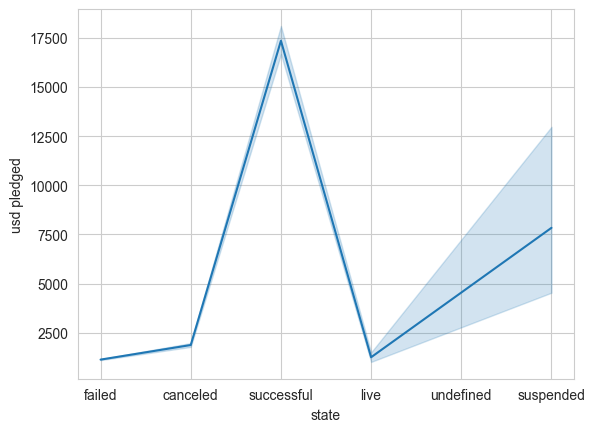

In [10]:
sns.lineplot(x='state', y='usd pledged', data=df)

<AxesSubplot:xlabel='state', ylabel='usd_goal_real_at_start'>

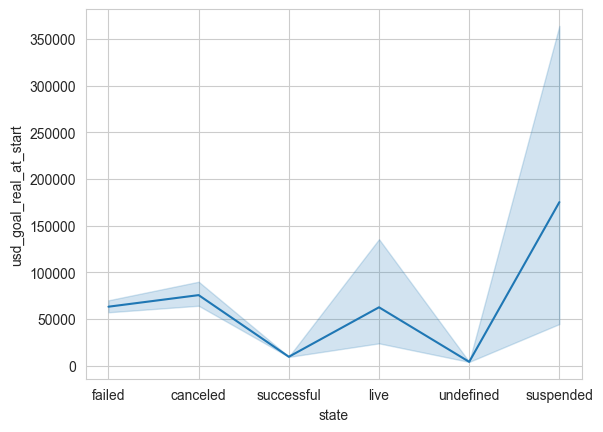

In [11]:
sns.lineplot(x='state', y='usd_goal_real_at_start', data=df)

<AxesSubplot:xlabel='state', ylabel='backers'>

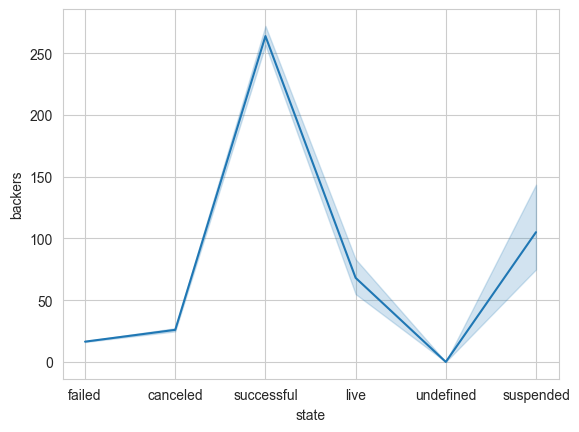

In [12]:
sns.lineplot(x='state', y='backers', data=df)

In [13]:
# grid = sns.FacetGrid(df, row='state', height=2.2, aspect=1.6)
# grid.map(sns.pointplot, 'main_category', 'usd pledged', 'currency', palette='deep')
# grid.add_legend()

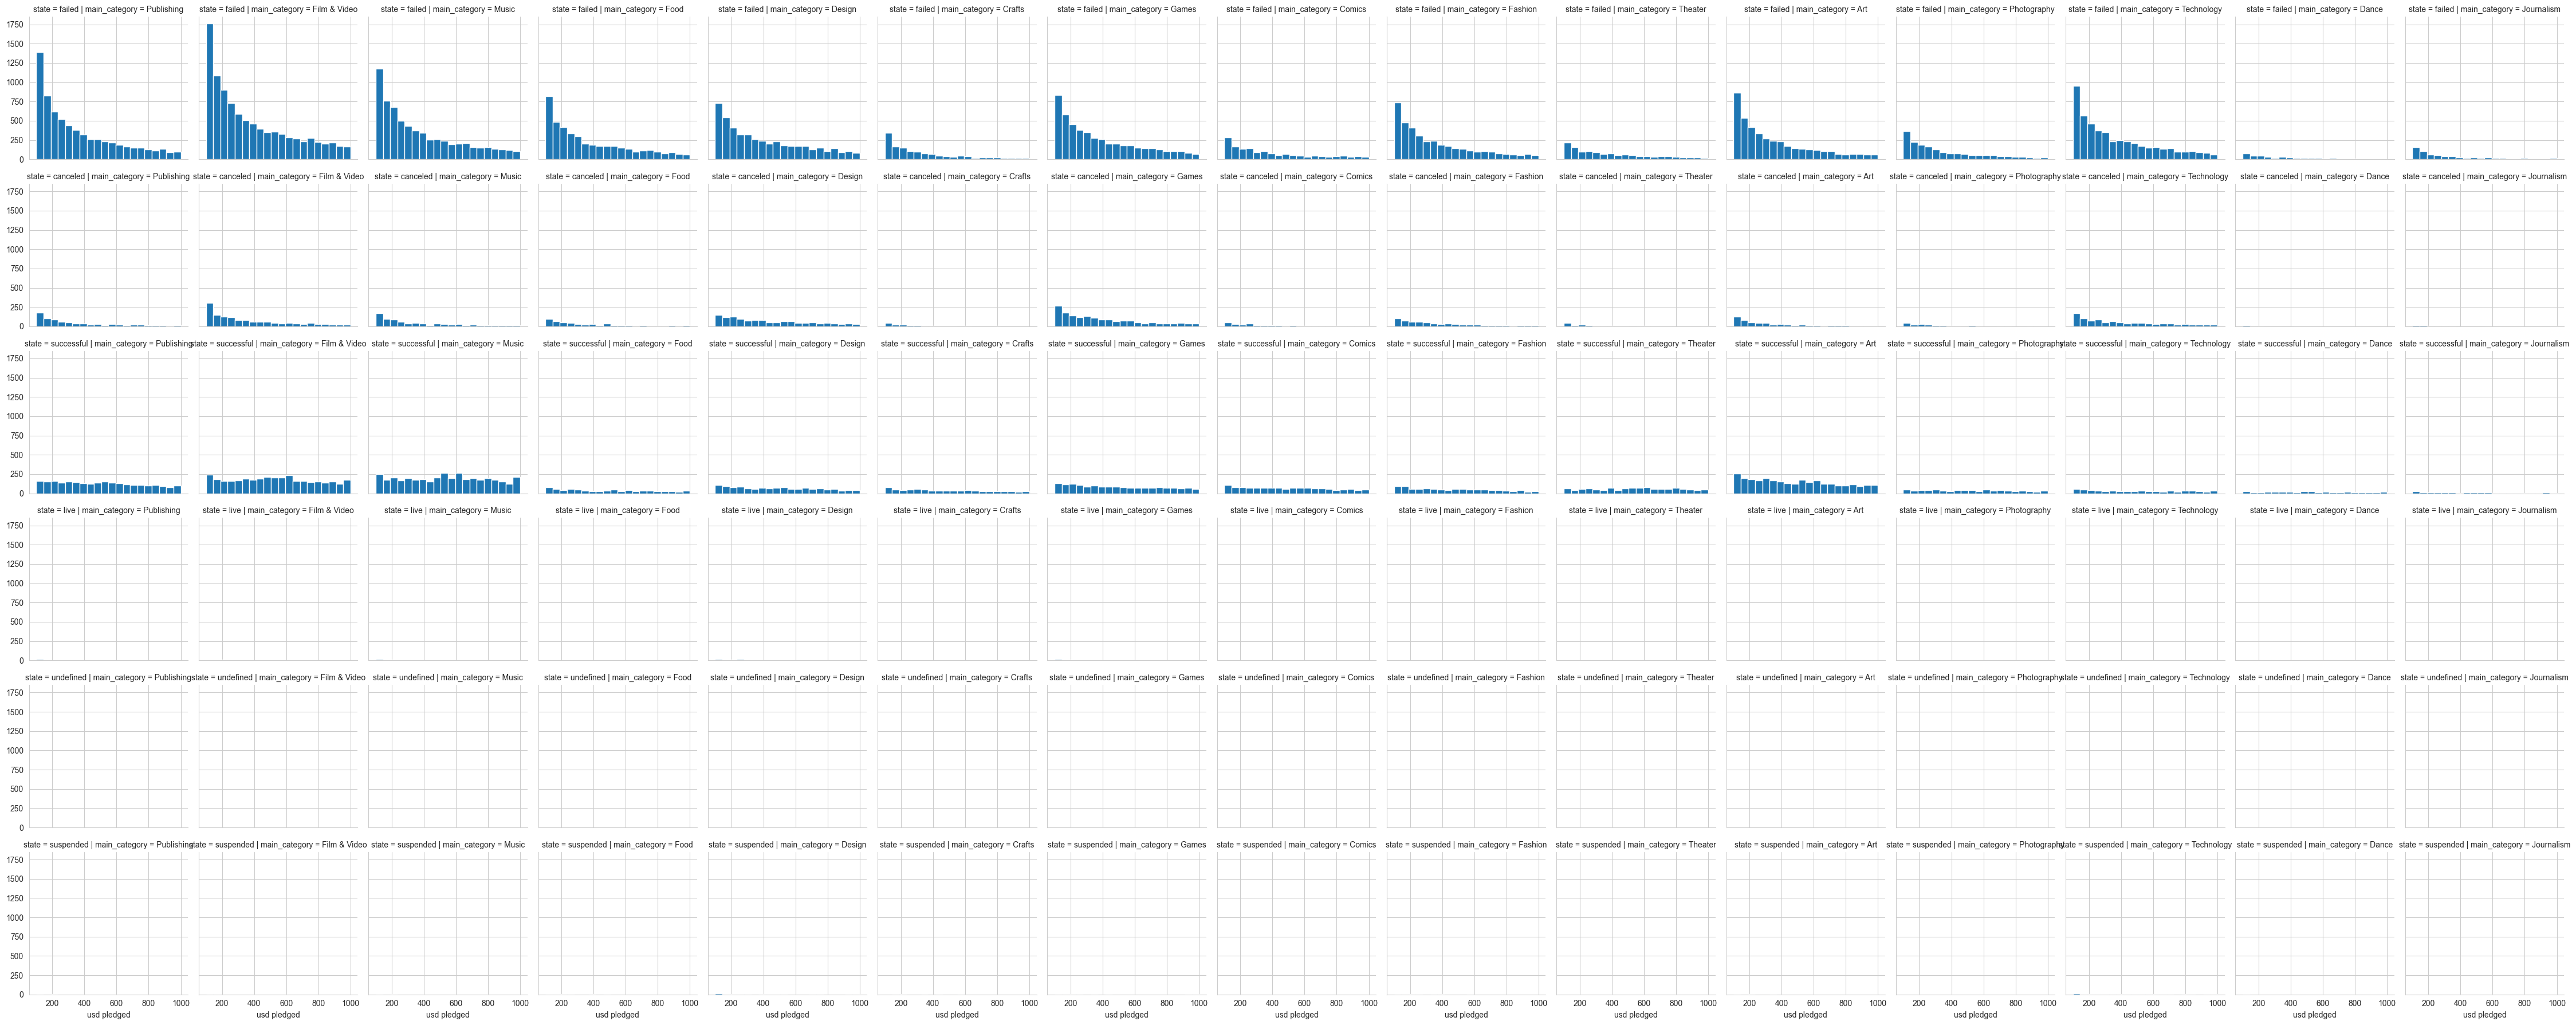

In [14]:
g = sns.FacetGrid(df, col='main_category', row='state')
g.map(plt.hist, 'usd pledged', bins=20, range=(100, 1000))

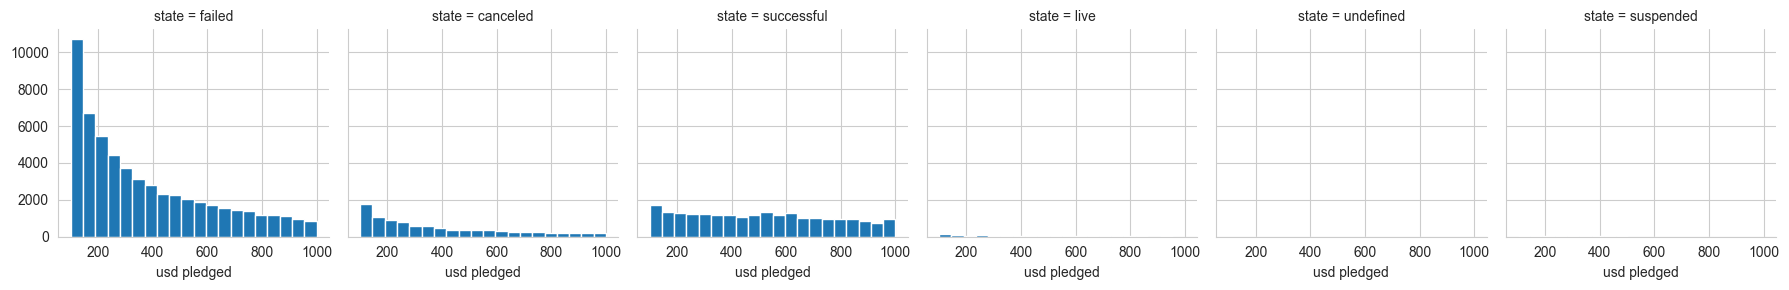

In [15]:
g = sns.FacetGrid(df, col='state')
g.map(plt.hist, 'usd pledged', bins=20, range=(100, 1000))

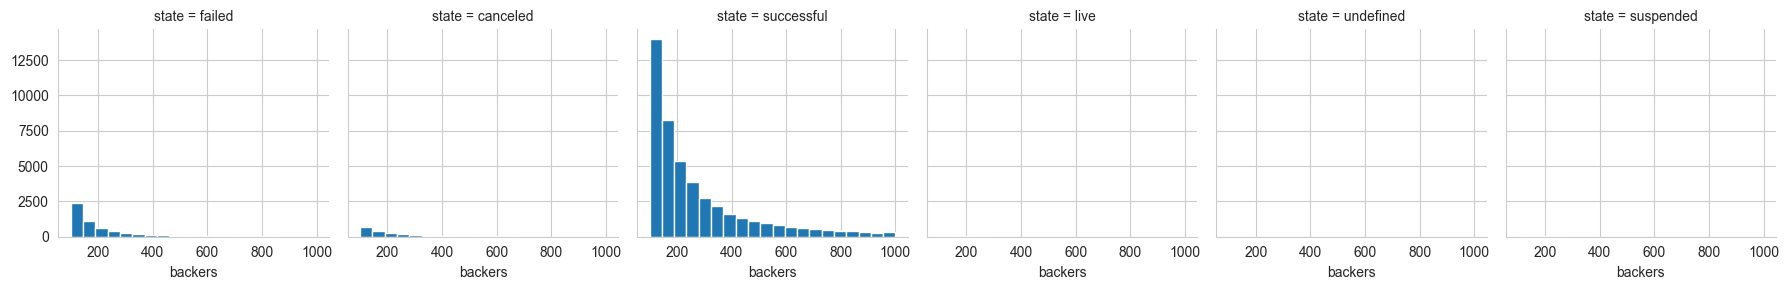

In [16]:
g = sns.FacetGrid(df, col='state')
g.map(plt.hist, 'backers', bins=20, range=(100, 1000))

<AxesSubplot:xlabel='main_category', ylabel='Count'>

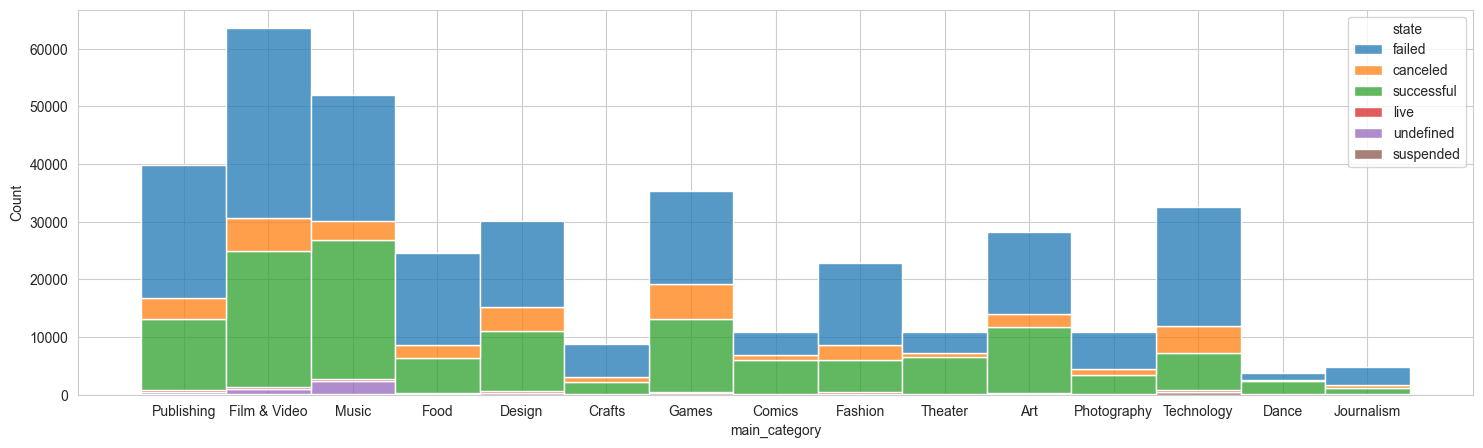

In [17]:
plt.figure(figsize=(18,5)) #adjust the size of plot
sns.histplot(x='main_category', hue="state", data=df, bins=20, stat='count', multiple='stack')

# Add duration field

In [84]:
df["duration"] = (pd.to_datetime(df.deadline, format="%d/%m/%Y") - pd.to_datetime(df.launched,
                                                                                  format="%d/%m/%Y %H:%M")).apply(
    lambda x: x.days)
df["duration"]

0         58
1         59
2         44
3         29
4         55
          ..
378656    29
378657    26
378658    45
378659    30
378660    27
Name: duration, Length: 378661, dtype: int64

<AxesSubplot:xlabel='state', ylabel='duration'>

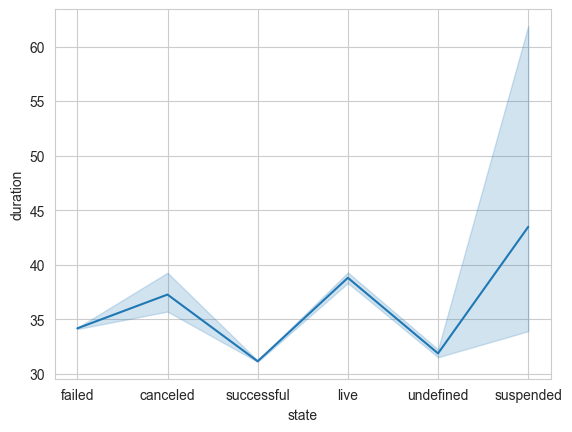

In [85]:
sns.lineplot(x='state', y='duration', data=df)

<AxesSubplot:xlabel='duration', ylabel='Count'>

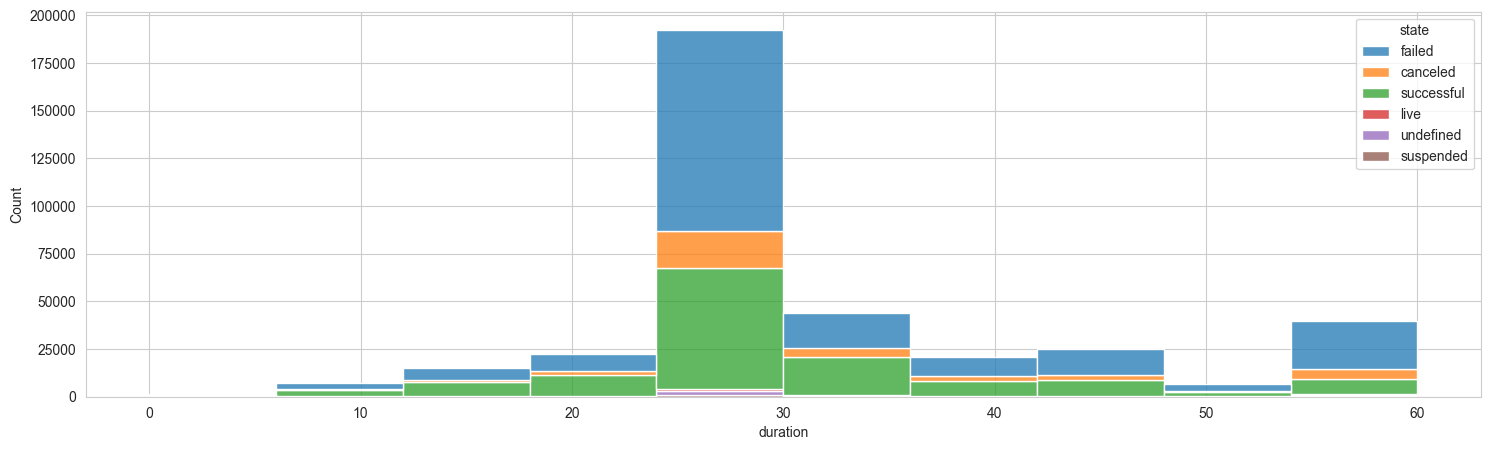

In [86]:
plt.figure(figsize=(18,5)) #adjust the size of plot
sns.histplot(x='duration', hue="state", data=df.drop(df[df.duration > 60].index), bins=10, stat='count', multiple='stack')

# Add completeRatio field

In [87]:
df["completeRatio"] = df['usd_pledged_realised at deadline'] / df['usd_goal_real_at_start']
df["completeRatio"]

0         0.000000
1         0.080700
2         0.004889
3         0.000200
4         0.065795
            ...   
378656    0.000500
378657    0.103333
378658    0.001333
378659    0.013333
378660    0.262000
Name: completeRatio, Length: 378661, dtype: float64

<AxesSubplot:xlabel='state', ylabel='completeRatio'>

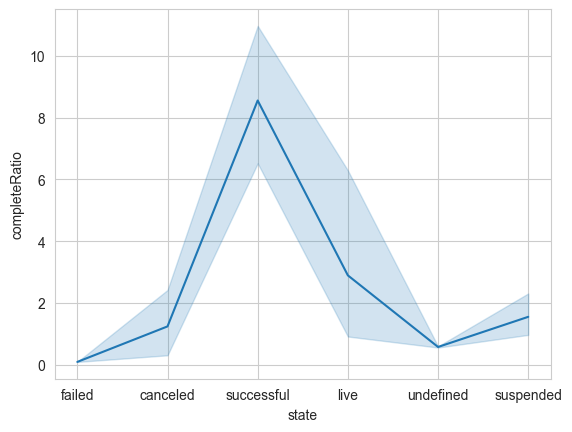

In [88]:
sns.lineplot(x='state', y='completeRatio', data=df)

<AxesSubplot:xlabel='completeRatio', ylabel='Count'>

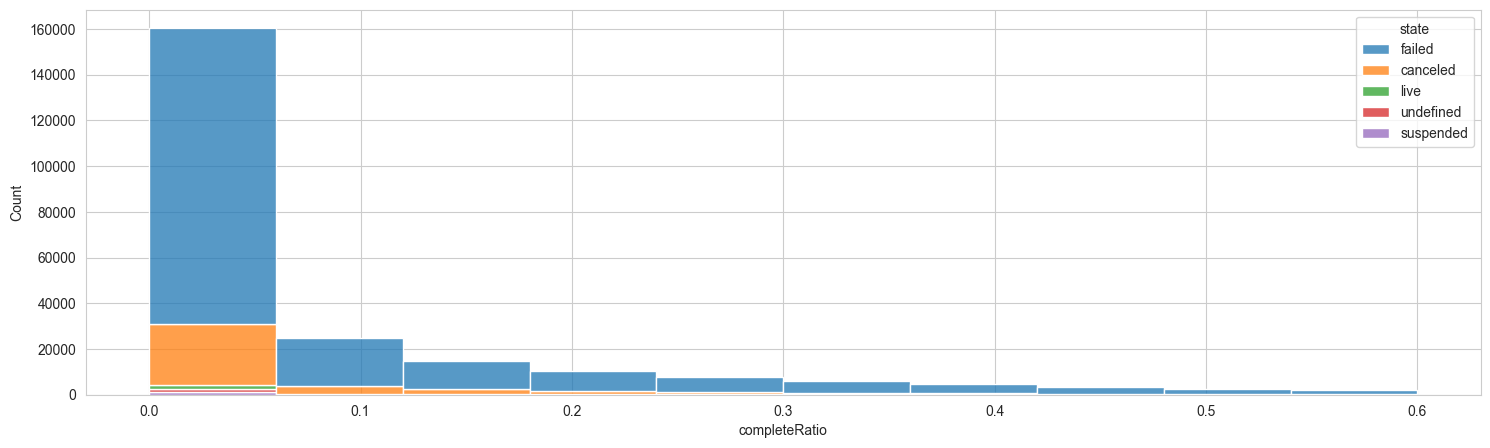

In [23]:
plt.figure(figsize=(18,5)) #adjust the size of plot
sns.histplot(x='completeRatio', hue="state", data=df.drop(df[df.completeRatio > 0.6].index), bins=10, stat='count', multiple='stack')

# Overview of our target feature

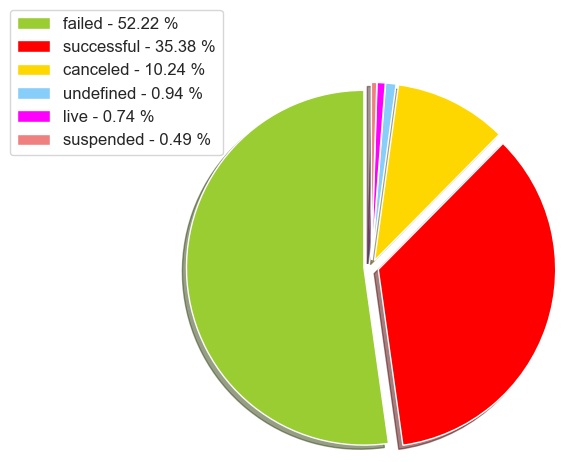

In [24]:
state_value_counts = df['state'].value_counts()
x = np.char.array([str(i) for i in state_value_counts.index])
y = np.array(state_value_counts.values)
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'magenta', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow',
          'grey', 'violet', 'white', 'cyan'][:len(state_value_counts.index)]
explode = [0.05] * len(state_value_counts.index)
porcent = 100. * y / y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow=True,
                         wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, explode=explode)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, y),
                                         key=lambda x: x[2],
                                         reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.5, 1.),
           fontsize=12)

plt.show()

# Unbalance data

# Check null values

In [89]:
df.isnull().sum()

ID                                     0
name                                   4
category                               0
main_category                          0
currency                               0
deadline                               0
goal                                   0
launched                               0
pledged                                0
state                                  0
backers                                0
country                                0
usd pledged                         3797
usd_pledged_realised at deadline       0
usd_goal_real_at_start                 0
duration                               0
completeRatio                          0
dtype: int64

# Drop ID and name, since they are unique value for each one.

In [90]:
df = df.drop(["ID", "name"], axis=1)

# Dealing with missing data

In [91]:
df['usd pledged'].fillna(method='pad', inplace=True)
# Removing the four NA record from our dataset
df.dropna(axis=0, inplace=True)
df.isnull().sum()

category                            0
main_category                       0
currency                            0
deadline                            0
goal                                0
launched                            0
pledged                             0
state                               0
backers                             0
country                             0
usd pledged                         0
usd_pledged_realised at deadline    0
usd_goal_real_at_start              0
duration                            0
completeRatio                       0
dtype: int64

In [92]:
# Drop Date
df = df.drop(["deadline", "launched"], axis=1)
df = df.drop(['pledged', 'goal'],axis=1)
df = df.drop(['category'],axis=1)

In [93]:
df.head()

,main_category,currency,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start,duration,completeRatio
0,Publishing,GBP,failed,0,GB,0.0,0.0,1533.95,58,0.000000
1,Film & Video,USD,failed,15,US,100.0,2421.0,30000.00,59,0.080700
2,Film & Video,USD,failed,3,US,220.0,220.0,45000.00,44,0.004889
3,Music,USD,failed,1,US,1.0,1.0,5000.00,29,0.000200
4,Film & Video,USD,canceled,14,US,1283.0,1283.0,19500.00,55,0.065795


# Transform Category

In [94]:
# categoryTransformTable = {}
# categorySet = set(df['category'])
# for index, i in enumerate(categorySet):
#     categoryTransformTable[i] = index

stateTransformTable = {}
stateSet = set(df['state'])
for index, i in enumerate(stateSet):
    stateTransformTable[i] = index
# #
# currencyTransformTable = {}
# currencySet = set(df['currency'])
# for index, i in enumerate(currencySet):
#     currencyTransformTable[i] = index
#
# countryTransformTable = {}
# countrySet = set(df['country'])
# for index, i in enumerate(countrySet):
#     countryTransformTable[i] = index
#
# main_categoryTransformTable = {}
# main_categorySet = set(df['main_category'])
# for index, i in enumerate(main_categorySet):
#     main_categoryTransformTable[i] = index

num_encode = {
    'state': stateTransformTable,
    # 'category': categoryTransformTable,
    # 'currency': currencyTransformTable,
    # 'country': countryTransformTable,
    # 'main_category': main_categoryTransformTable,
}
# Do Transformation
df.replace(num_encode, inplace=True)

In [95]:
num_encode

{'state': {'undefined': 0,
  'canceled': 1,
  'suspended': 2,
  'live': 3,
  'successful': 4,
  'failed': 5}}

# One-hot vector conversion

In [102]:
main_category = pd.get_dummies(df['main_category'], prefix='main_category')
# category = pd.get_dummies(df['category'], prefix='category')
currency = pd.get_dummies(df['currency'], prefix='currency')
country = pd.get_dummies(df['country'], prefix='country')

onehot_df = pd.concat([df, main_category, currency, country], axis=1)
onehot_df = onehot_df.drop(['main_category', 'currency', 'country'], axis=1)

In [103]:
onehot_df.head()

,state,backers,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start,duration,completeRatio,main_category_Art,main_category_Comics,main_category_Crafts,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,5,0,0.0,0.0,1533.95,58,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,15,100.0,2421.0,30000.00,59,0.080700,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,3,220.0,220.0,45000.00,44,0.004889,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,1,1.0,1.0,5000.00,29,0.000200,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,14,1283.0,1283.0,19500.00,55,0.065795,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Normalize data

In [104]:
normalized_df=(onehot_df-onehot_df.min())/(onehot_df.max()-onehot_df.min())

In [105]:
normalized_df.head()

,state,backers,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start,duration,completeRatio,main_category_Art,main_category_Comics,main_category_Crafts,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1.0,0.000000,0.000000e+00,0.000000e+00,0.000009,0.003465,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.000068,4.916666e-06,1.190325e-04,0.000180,0.003525,7.738937e-07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.000014,1.081666e-05,1.081666e-05,0.000270,0.002629,4.688327e-08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.000005,4.916666e-08,4.916666e-08,0.000030,0.001733,1.917952e-09,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.2,0.000064,6.308082e-05,6.308082e-05,0.000117,0.003286,6.309571e-07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
state = df['state'].copy()
onehot_df = normalized_df
onehot_df['state'] = state

In [107]:
onehot_df.head()

,state,backers,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start,duration,completeRatio,main_category_Art,main_category_Comics,main_category_Crafts,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,5,0.000000,0.000000e+00,0.000000e+00,0.000009,0.003465,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.000068,4.916666e-06,1.190325e-04,0.000180,0.003525,7.738937e-07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5,0.000014,1.081666e-05,1.081666e-05,0.000270,0.002629,4.688327e-08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,0.000005,4.916666e-08,4.916666e-08,0.000030,0.001733,1.917952e-09,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.000064,6.308082e-05,6.308082e-05,0.000117,0.003286,6.309571e-07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Check KNN model


In [110]:
onehot_df.head()

,state,backers,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start,duration,completeRatio,main_category_Art,main_category_Comics,main_category_Crafts,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,5,0.000000,0.000000e+00,0.000000e+00,0.000009,0.003465,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.000068,4.916666e-06,1.190325e-04,0.000180,0.003525,7.738937e-07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5,0.000014,1.081666e-05,1.081666e-05,0.000270,0.002629,4.688327e-08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,0.000005,4.916666e-08,4.916666e-08,0.000030,0.001733,1.917952e-09,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.000064,6.308082e-05,6.308082e-05,0.000117,0.003286,6.309571e-07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [112]:
from sklearn.neighbors import KNeighborsClassifier

# Split data into training, validation and test sets
train, test = train_test_split(onehot_df, test_size=0.3)
train, val = train_test_split(train, test_size=0.3)

print(f"Testing Model {KNeighborsClassifier.__name__}")
X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
y_train, y_test = train['state'], test['state']
neighbor_size = [3, 5, 7, 9, 11, 13]

metricNames = ["euclidean", "manhattan", "chebyshev"]
result = {}

for k in metricNames:
    result[k] = {}
    for neighbors in neighbor_size:
        print(f"Testing <metric: {k}, neighborSize: {neighbors}>: ", end="")
        knn = KNeighborsClassifier(n_neighbors=neighbors, metric=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")
        print(f"Result: Accuracy {accuracy}, F1 {f1}")
        result[k][neighbors] = {
            "Accuracy": accuracy,
            "F1": f1
        }

Testing Model KNeighborsClassifier
Testing <metric: euclidean, neighborSize: 3>: Result: Accuracy 0.7862129068037571, F1 0.4746938491544641
Testing <metric: euclidean, neighborSize: 5>: Result: Accuracy 0.8011426156920396, F1 0.471354784830226
Testing <metric: euclidean, neighborSize: 7>: Result: Accuracy 0.8078152096409299, F1 0.4646478149447306
Testing <metric: euclidean, neighborSize: 9>: Result: Accuracy 0.809417336420215, F1 0.4606639716677958
Testing <metric: euclidean, neighborSize: 11>: Result: Accuracy 0.8095933943080484, F1 0.45832988597555113
Testing <metric: euclidean, neighborSize: 13>: Result: Accuracy 0.8087483164464476, F1 0.455789853102142
Testing <metric: manhattan, neighborSize: 3>: 

KeyboardInterrupt: 

# From the graph we can know that...


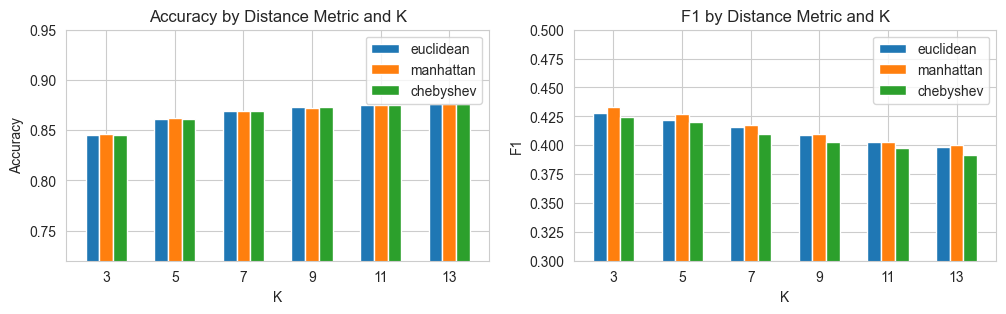

In [61]:
f = plt.figure(figsize=(12,3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

labels = neighbor_size
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax1.bar(x - width + (width) * (index), [neighborResult[i]['Accuracy'] for i in neighborResult], width, label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('K')
ax1.set_title('Accuracy by Distance Metric and K')
ax1.set_xticks(x, labels)
ax1.set_ylim([0.72, 0.95])
ax1.legend()

labels = neighbor_size
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax2.bar(x - width + (width) * (index), [neighborResult[i]['F1'] for i in neighborResult], width, label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('F1')
ax2.set_xlabel('K')
ax2.set_title('F1 by Distance Metric and K')
ax2.set_xticks(x, labels)
ax2.set_ylim([0.3, 0.50])
ax2.legend()


plt.show()

# KNN model

In [45]:
# # Split data into training, validation and test sets
# train, test = train_test_split(df, test_size=0.3)
# train, val = train_test_split(train, test_size=0.3)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# print(f"Testing Model {KNeighborsClassifier.__name__}")
# X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
# y_train, y_test = train['state'], test['state']
# neighbor_size = [7]
#
# metricNames = ["manhattan"]
# result = {}
#
# for k in metricNames:
#     result[k] = {}
#     for neighbors in neighbor_size:
#         print(f"Testing <metric: {k}, neighborSize: {neighbors}>: ", end="")
#         knn = KNeighborsClassifier(n_neighbors=neighbors, metric=k)
#         knn.fit(X_train, y_train)
#         y_pred = knn.predict(X_test)
#         accuracy = metrics.accuracy_score(y_test, y_pred)
#         f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")
#         print(f"Result: Accuracy {accuracy}, F1 {f1}")
#         result[k][neighbors] = {
#             "Accuracy": accuracy,
#             "F1": f1
#         }

Testing Model KNeighborsClassifier
Testing <metric: manhattan, neighborSize: 7>: 

In [ ]:
# f = plt.figure(figsize=(12,3))
# ax1 = f.add_subplot(121)
# ax2 = f.add_subplot(122)
#
# labels = neighbor_size
# width = 0.2  # the width of the bars
# x = np.arange(len(labels))  # the label locations
# for index, metricName in enumerate(result):
#     neighborResult = result[metricName]
#     rect = ax1.bar(x - width + (width) * (index), [neighborResult[i]['Accuracy'] for i in neighborResult], width, label=metricName)
# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax1.set_ylabel('Accuracy')
# ax1.set_xlabel('K')
# ax1.set_title('Accuracy by Distance Metric and K')
# ax1.set_xticks(x, labels)
# ax1.set_ylim([0.82, 0.88])
# ax1.legend()
#
# labels = neighbor_size
# width = 0.2  # the width of the bars
# x = np.arange(len(labels))  # the label locations
# for index, metricName in enumerate(result):
#     neighborResult = result[metricName]
#     rect = ax2.bar(x - width + (width) * (index), [neighborResult[i]['F1'] for i in neighborResult], width, label=metricName)
# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax2.set_ylabel('F1')
# ax2.set_xlabel('K')
# ax2.set_title('F1 by Distance Metric and K')
# ax2.set_xticks(x, labels)
# ax2.set_ylim([0.32, 0.49])
# ax2.legend()
# plt.show()

In [44]:
df

,category,main_category,currency,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start,duration,completeRatio
0,16,12,11,5,0,17,0.0,0.0,1533.95,58,0.000000
1,154,13,4,5,15,7,100.0,2421.0,30000.00,59,0.080700
2,154,13,4,5,3,7,220.0,220.0,45000.00,44,0.004889
3,38,11,4,5,1,7,1.0,1.0,5000.00,29,0.000200
4,32,13,4,1,14,7,1283.0,1283.0,19500.00,55,0.065795
...,...,...,...,...,...,...,...,...,...,...,...
378656,59,13,4,1,1,7,25.0,25.0,50000.00,29,0.000500
378657,154,13,4,5,5,7,155.0,155.0,1500.00,26,0.103333
378658,154,13,4,5,1,7,20.0,20.0,15000.00,45,0.001333
378659,37,3,4,5,6,7,200.0,200.0,15000.00,30,0.013333


In [62]:
from sklearn.naive_bayes import GaussianNB
train, test = train_test_split(df, test_size=0.3)
train, val = train_test_split(train, test_size=0.3)
print(f"Testing Model {GaussianNB.__name__}")
X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
y_train, y_test = train['state'], test['state']
metricValue = range(1, 10)
result = {}

for k in metricValue:
    result[k] = {}
    print(f"Testing <metric: {k}>: ", end="")
    gn = GaussianNB(var_smoothing=k*1e-9)
    gn.fit(X_train, y_train)
    y_pred = gn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")
    print(f"Result: Accuracy {accuracy}, F1 {f1}")
    result[k][0] = {
        "Accuracy": accuracy,
        "F1": f1
    }

Testing Model GaussianNB
Testing <metric: 1>: Result: Accuracy 0.25366420479053514, F1 0.1361655169483059
Testing <metric: 2>: Result: Accuracy 0.25637549626317135, F1 0.13928559708131313
Testing <metric: 3>: Result: Accuracy 0.2585498111779153, F1 0.14108678772899583
Testing <metric: 4>: Result: Accuracy 0.2600991205908503, F1 0.14230172756835868
Testing <metric: 5>: Result: Accuracy 0.2611290592346764, F1 0.14308550215812724
Testing <metric: 6>: Result: Accuracy 0.262035757357019, F1 0.1438912369833921
Testing <metric: 7>: Result: Accuracy 0.26251991654856116, F1 0.1441323756063427
Testing <metric: 8>: Result: Accuracy 0.26282801785226984, F1 0.14447213854467691
Testing <metric: 9>: Result: Accuracy 0.26318013362793685, F1 0.14492366003833348


In [63]:
X_train

,category,main_category,currency,goal,pledged,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start,duration,completeRatio
168851,11,13,4,1200.0,0.00,0,7,0.00,0.00,1200.00,29,0.000000
107167,72,6,4,5500.0,150.00,2,7,150.00,150.00,5500.00,29,0.027273
93783,17,13,4,30000.0,2946.00,36,7,835.00,2946.00,30000.00,41,0.098200
356561,37,3,4,25000.0,25185.37,153,7,474.00,25185.37,25000.00,44,1.007415
330436,27,11,4,500.0,60.00,2,7,60.00,60.00,500.00,29,0.120000
...,...,...,...,...,...,...,...,...,...,...,...,...
326246,72,6,4,500.0,110.00,8,7,110.00,110.00,500.00,14,0.220000
273779,65,0,4,500.0,0.00,0,7,0.00,0.00,500.00,14708,0.000000
197863,89,1,4,800.0,1197.00,35,7,49.00,1197.00,800.00,29,1.496250
377279,98,13,11,1200.0,1493.00,17,17,2124.38,2163.67,1739.05,29,1.244168


In [64]:
from sklearn.ensemble import RandomForestClassifier

# Split data into training, validation and test sets
train, test = train_test_split(df, test_size=0.3)
train, val = train_test_split(train, test_size=0.3)

print(f"Testing Model {RandomForestClassifier.__name__}")
X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
y_train, y_test = train['state'], test['state']
estimators = [7,8,9,10,11,12,13]
min_samples = [2,3,4,5,6]
result = {}

for k in estimators:
    result[k] = {}
    for neighbors in min_samples:
        print(f"Testing <metric: {k}, neighborSize: {neighbors}>: ", end="")
        rf = RandomForestClassifier(random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")
        print(f"Result: Accuracy {accuracy}, F1 {f1}")
        result[k][neighbors] = {
            "Accuracy": accuracy,
            "F1": f1
        }

Testing Model RandomForestClassifier
Testing <metric: 7, neighborSize: 2>: Result: Accuracy 0.8744971346578755, F1 0.4941970343738156
Testing <metric: 7, neighborSize: 3>: Result: Accuracy 0.8744971346578755, F1 0.4941970343738156
Testing <metric: 7, neighborSize: 4>: Result: Accuracy 0.8744971346578755, F1 0.4941970343738156
Testing <metric: 7, neighborSize: 5>: Result: Accuracy 0.8744971346578755, F1 0.4941970343738156
Testing <metric: 7, neighborSize: 6>: Result: Accuracy 0.8744971346578755, F1 0.4941970343738156
Testing <metric: 8, neighborSize: 2>: Result: Accuracy 0.8744971346578755, F1 0.4941970343738156
Testing <metric: 8, neighborSize: 3>: Result: Accuracy 0.8744971346578755, F1 0.4941970343738156
Testing <metric: 8, neighborSize: 4>: Result: Accuracy 0.8744971346578755, F1 0.4941970343738156
Testing <metric: 8, neighborSize: 5>: Result: Accuracy 0.8744971346578755, F1 0.4941970343738156
Testing <metric: 8, neighborSize: 6>: Result: Accuracy 0.8744971346578755, F1 0.4941970343


KeyboardInterrupt

